# My First Colab Notebook


# Import Libraries

In [0]:
%tensorflow_version 1.x
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

TensorFlow 1.x selected.


Using TensorFlow backend.


#Stuff

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
batch_size = 64
num_classes = 10
epochs = 50
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

history = model.fit_generator(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
937/937 [==============================] - 33s 35ms/step - loss: 0.3652 - acc: 0.8886 - val_loss: 0.0922 - val_acc: 0.9722
Epoch 2/50
937/937 [==============================] - 25s 27ms/step - loss: 0.1099 - acc: 0.9673 - val_loss: 0.0630 - val_acc: 0.9807
Epoch 3/50
937/937 [==============================] - 25s 26ms/step - loss: 0.0827 - acc: 0.9755 - val_loss: 0.0472 - val_acc: 0.9833
Epoch 4/50
937/937 [==============================] - 25s 26ms/step - loss: 0.0685 - acc: 0.9786 - val_loss: 0.0354 - val_acc: 0.9897
Epoch 5/50
937/937 [==============================] - 25s 26ms/step - loss: 0.0650 - acc: 0.9799 - val_loss: 0.0379 - val_acc: 0.9884
Epoch 6/50
937/937 [=============

In [0]:
model.save('mnist_keras.h5')

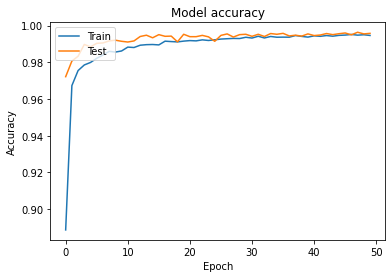

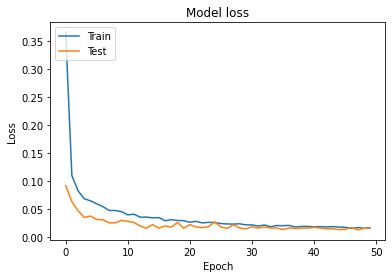

In [0]:
from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# # Plot the loss and accuracy curves for training and validation 
# fig, ax = plt.subplots(2,1, figsize=(18, 10))
# ax[0].plot(history.history['loss'], color='b', label="Training loss")
# ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
# legend = ax[0].legend(loc='best', shadow=True)

# ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
# ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
# legend = ax[1].legend(loc='best', shadow=True)
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()